<a href="https://colab.research.google.com/github/KubraErensoy/IMDb_WebScraping/blob/main/IMDb_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline


In [2]:
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from sklearn.linear_model import RidgeCV
import warnings
warnings.filterwarnings("ignore")


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [4]:
df=pd.read_csv('imdb_scraping.csv')

# **Data Exploration**

In [5]:
df.head(5)

,movie_name,release_year,runtime,director,genre1,genre2,genre3,rating,user_reviews,critic_reviews,metascore,budget,gross
0,Avatar,2009,2 hours 42 minutes,James Cameron,Action,Adventure,Fantasy,7.80,3.5K,479,83.00,"$237,000,000 (estimated)","$2,847,379,794"
1,Avengers: Endgame,2019,3 hours 1 minute,Anthony Russo,Action,Adventure,Drama,8.40,9.4K,589,78.00,"$356,000,000 (estimated)","$2,797,501,328"
2,Titanic,1997,3 hours 14 minutes,James Cameron,Drama,Romance,-,7.90,3.1K,331,75.00,"$200,000,000 (estimated)","$2,201,647,264"
3,Star Wars: Episode VII - The Force Awakens,2015,2 hours 18 minutes,J.J. Abrams,Action,Adventure,Sci-Fi,7.90,5K,909,80.00,"$245,000,000 (estimated)","$2,069,521,700"
4,Avengers: Infinity War,2018,2 hours 29 minutes,Anthony Russo,Action,Adventure,Sci-Fi,8.50,4.5K,626,68.00,"$321,000,000 (estimated)","$2,048,359,754"


In [6]:
df.shape

(995, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_name      995 non-null    object 
 1   release_year    995 non-null    int64  
 2   runtime         995 non-null    object 
 3   director        995 non-null    object 
 4   genre1          995 non-null    object 
 5   genre2          995 non-null    object 
 6   genre3          995 non-null    object 
 7   rating          995 non-null    float64
 8   user_reviews    995 non-null    object 
 9   critic_reviews  995 non-null    object 
 10  metascore       963 non-null    float64
 11  budget          963 non-null    object 
 12  gross           995 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 101.2+ KB


In [8]:
df.head(3)

,movie_name,release_year,runtime,director,genre1,genre2,genre3,rating,user_reviews,critic_reviews,metascore,budget,gross
0,Avatar,2009,2 hours 42 minutes,James Cameron,Action,Adventure,Fantasy,7.80,3.5K,479,83.00,"$237,000,000 (estimated)","$2,847,379,794"
1,Avengers: Endgame,2019,3 hours 1 minute,Anthony Russo,Action,Adventure,Drama,8.40,9.4K,589,78.00,"$356,000,000 (estimated)","$2,797,501,328"
2,Titanic,1997,3 hours 14 minutes,James Cameron,Drama,Romance,-,7.90,3.1K,331,75.00,"$200,000,000 (estimated)","$2,201,647,264"


In [9]:
df.tail(3)

,movie_name,release_year,runtime,director,genre1,genre2,genre3,rating,user_reviews,critic_reviews,metascore,budget,gross
992,Big Momma's House,2000,1 hour 39 minutes,Raja Gosnell,Action,Comedy,Crime,5.20,164,99,33.00,"$30,000,000 (estimated)","$173,959,438"
993,In Time,2011,1 hour 49 minutes,Andrew Niccol,Action,Sci-Fi,Thriller,6.70,646,364,53.00,"$40,000,000 (estimated)","$173,930,596"
994,Operation Mekong,2016,2 hours 3 minutes,Dante Lam,Action,Adventure,Crime,6.50,25,36,NaN,"$30,200,000 (estimated)","$173,839,072"


In [10]:
df.describe()

,release_year,rating,metascore
count,995.00,995.00,963.00
mean,2007.42,6.80,59.51
std,10.13,0.91,15.97
min,1937.00,2.30,12.00
25%,2001.00,6.20,48.00
50%,2010.00,6.80,59.00
75%,2015.00,7.40,71.00
max,2021.00,9.20,100.00


# **Data Cleaning**


**runtime**

In [11]:
df['runtime']=df['runtime'].str.replace(" hours",'')
df['runtime']=df['runtime'].str.replace(' hour','')
df['runtime']=df['runtime'].str.replace(" minutes",'')
df['runtime']=df['runtime'].str.replace(" minute",'')
df['runtime']=df['runtime'].str.replace(" ",':')

In [12]:
dfrun=df['runtime'].str.split(':',expand=True)
dfrun=dfrun.astype(float)

In [13]:
df['runtime']=dfrun[0]*60+dfrun[1]

In [14]:
df['runtime']

0     162.00
1     181.00
2     194.00
3     138.00
4     149.00
       ...  
990   111.00
991    99.00
992    99.00
993   109.00
994   123.00
Name: runtime, Length: 995, dtype: float64

**user_reviews**

In [15]:
df[["u","u1"]]=df[df["user_reviews"].str.contains("K")]["user_reviews"].str.split("K", expand = True)

In [16]:
df["u"]=df["u"].apply(lambda x: float(x)*1000)

In [17]:
df.loc[df.u.isna(), 'u'] = df[~df["user_reviews"].str.contains("K")]["user_reviews"]


In [18]:
df["u"]

0     3500.00
1     9400.00
2     3100.00
3     5000.00
4     4500.00
        ...  
990       297
991       474
992       164
993       646
994        25
Name: u, Length: 995, dtype: object

In [19]:
df.drop(["user_reviews","u1"],axis=1,inplace=True)

In [20]:
df=df.rename(columns={'u':'user_reviews'})

In [21]:
df["user_reviews"]=df["user_reviews"].astype(float)
df["user_reviews"]

0     3500.00
1     9400.00
2     3100.00
3     5000.00
4     4500.00
        ...  
990    297.00
991    474.00
992    164.00
993    646.00
994     25.00
Name: user_reviews, Length: 995, dtype: float64

**critic_reviews**

In [22]:
df[["c","c1"]]=df[df["critic_reviews"].str.contains("K")]["critic_reviews"].str.split("K", expand = True)

df["c"]=df["c"].apply(lambda x: float(x)*1000)

df.loc[df.c.isna(), 'c'] = df[~df["critic_reviews"].str.contains("K")]["critic_reviews"]

df["c"]

0      479
1      589
2      331
3      909
4      626
      ... 
990    260
991    175
992     99
993    364
994     36
Name: c, Length: 995, dtype: object

In [23]:
df.drop(["critic_reviews","c1"],axis=1,inplace=True)

df=df.rename(columns={'c':'critic_reviews'})

df["critic_reviews"]=df["critic_reviews"].astype(float)

df["critic_reviews"]

0     479.00
1     589.00
2     331.00
3     909.00
4     626.00
       ...  
990   260.00
991   175.00
992    99.00
993   364.00
994    36.00
Name: critic_reviews, Length: 995, dtype: float64

**budget**

In [24]:
df["budget"]

0      $237,000,000 (estimated)
1      $356,000,000 (estimated)
2      $200,000,000 (estimated)
3      $245,000,000 (estimated)
4      $321,000,000 (estimated)
                 ...           
990     $35,000,000 (estimated)
991    $120,000,000 (estimated)
992     $30,000,000 (estimated)
993     $40,000,000 (estimated)
994     $30,200,000 (estimated)
Name: budget, Length: 995, dtype: object

In [25]:
df["budget"]=df["budget"].str.replace("(estimated)","")
df["budget"]=df["budget"].str.replace("$",'')
df["budget"]=df["budget"].str.replace("£",'')
df["budget"]=df["budget"].str.replace("€",'')
df["budget"]=df["budget"].str.replace(",",'')
df["budget"]=df["budget"].str.replace("CN¥",'')
df["budget"]=df["budget"].str.replace("¥",'')
df["budget"]=df["budget"].str.replace("₹",'')

df["budget"]=df["budget"].str.replace(r"\(.*\)","") #'()' parantez işaretini kaldırır


In [26]:
df["budget"]=df["budget"].astype(float)
df["budget"]

0     237000000.00
1     356000000.00
2     200000000.00
3     245000000.00
4     321000000.00
          ...     
990    35000000.00
991   120000000.00
992    30000000.00
993    40000000.00
994    30200000.00
Name: budget, Length: 995, dtype: float64

**gross**

In [27]:
df["gross"]

0      $2,847,379,794
1      $2,797,501,328
2      $2,201,647,264
3      $2,069,521,700
4      $2,048,359,754
            ...      
990      $173,965,010
991      $173,961,069
992      $173,959,438
993      $173,930,596
994      $173,839,072
Name: gross, Length: 995, dtype: object

In [28]:
df["gross"]=df["gross"].str.replace("$",'')

df["gross"]=df["gross"].str.replace(",",'')

df["gross"]=df["gross"].astype(float)


In [29]:
df["gross"]

0     2847379794.00
1     2797501328.00
2     2201647264.00
3     2069521700.00
4     2048359754.00
           ...     
990    173965010.00
991    173961069.00
992    173959438.00
993    173930596.00
994    173839072.00
Name: gross, Length: 995, dtype: float64

In [30]:
df.isnull().sum()

movie_name         0
release_year       0
runtime           20
director           0
genre1             0
genre2             0
genre3             0
rating             0
metascore         32
budget            32
gross              0
user_reviews       0
critic_reviews     0
dtype: int64

In [31]:
df["runtime"].median()

115.0

In [32]:
df["runtime"]=df["runtime"].fillna(df["runtime"].median())


In [33]:
df["metascore"].median()

59.0

In [34]:
df["metascore"] = df['metascore'].fillna(df["metascore"].median())


In [35]:
df["budget"]=df["budget"].fillna(df["budget"].median())

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_name      995 non-null    object 
 1   release_year    995 non-null    int64  
 2   runtime         995 non-null    float64
 3   director        995 non-null    object 
 4   genre1          995 non-null    object 
 5   genre2          995 non-null    object 
 6   genre3          995 non-null    object 
 7   rating          995 non-null    float64
 8   metascore       995 non-null    float64
 9   budget          995 non-null    float64
 10  gross           995 non-null    float64
 11  user_reviews    995 non-null    float64
 12  critic_reviews  995 non-null    float64
dtypes: float64(7), int64(1), object(5)
memory usage: 101.2+ KB


# **Data Analysis and Visulizations**

In [37]:
df.describe()

,release_year,runtime,rating,metascore,budget,gross,user_reviews,critic_reviews
count,995.00,995.00,995.00,995.00,995.00,995.00,995.00,995.00
mean,2007.42,117.18,6.80,59.49,96252448.24,404754821.95,922.42,264.32
std,10.13,21.42,0.91,15.72,99768139.92,292646207.99,1055.41,168.06
min,1937.00,70.00,2.30,12.00,15000.00,173839072.00,4.00,1.00
25%,2001.00,101.00,6.20,48.00,45000000.00,219239608.50,322.50,136.00
50%,2010.00,115.00,6.80,59.00,80000000.00,304868961.00,612.00,234.00
75%,2015.00,130.00,7.40,71.00,130000000.00,467293987.00,1100.00,368.50
max,2021.00,238.00,9.20,100.00,2500000000.00,2847379794.00,11300.00,1000.00


In [38]:
df.corr()

,release_year,runtime,rating,metascore,budget,gross,user_reviews,critic_reviews
release_year,1.00,0.00,-0.15,-0.13,0.26,0.20,0.15,0.44
runtime,0.00,1.00,0.37,0.25,0.23,0.29,0.43,0.28
rating,-0.15,0.37,1.00,0.75,0.03,0.25,0.36,0.31
metascore,-0.13,0.25,0.75,1.00,-0.03,0.21,0.28,0.27
budget,0.26,0.23,0.03,-0.03,1.00,0.33,0.19,0.23
gross,0.20,0.29,0.25,0.21,0.33,1.00,0.49,0.43
user_reviews,0.15,0.43,0.36,0.28,0.19,0.49,1.00,0.52
critic_reviews,0.44,0.28,0.31,0.27,0.23,0.43,0.52,1.00


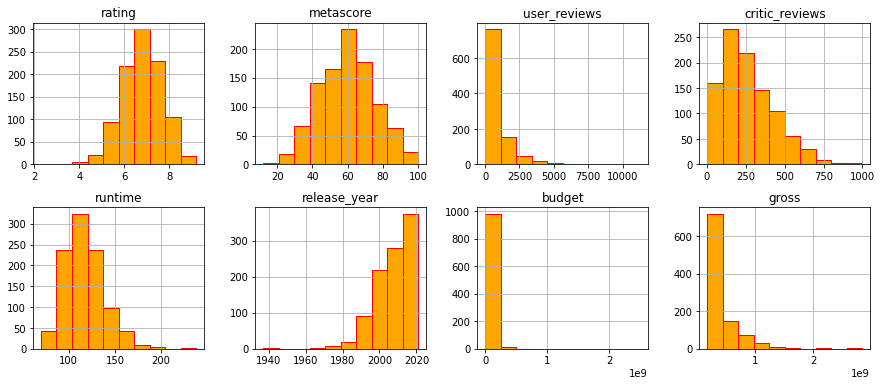

In [39]:
movie_numeric = ['rating', 'metascore', 'user_reviews',"critic_reviews","runtime","release_year","budget","gross"]

df[movie_numeric].hist(figsize = (15, 6), color = 'orange', edgecolor = 'red', layout = (2, 4));

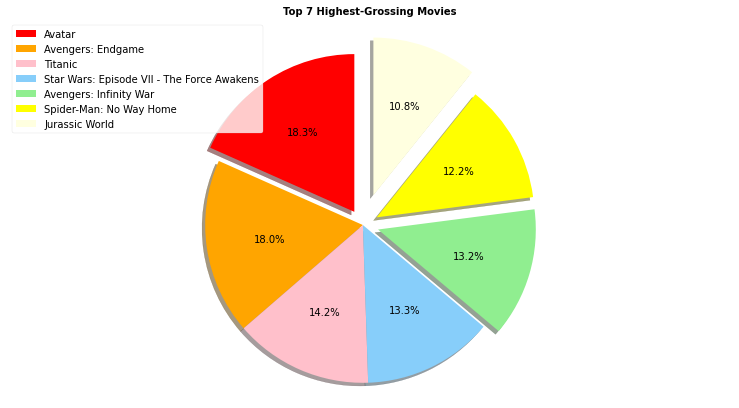

In [40]:
plt.style.use('seaborn-notebook')
fig1, ax1 = plt.subplots(figsize =(13, 7))
pie_movies='Avatar','Avengers: Endgame','Titanic','Star Wars: Episode VII - The Force Awakens','Avengers: Infinity War','Spider-Man: No Way Home','Jurassic World'
gross = [2847379794, 2797501328, 2201647264, 2069521700, 2048359754,1892220052,1671537444]
colors_list = ["red",'orange','pink', 'lightskyblue','lightgreen', 'yellow','lightyellow']
explode = (0.1, 0, 0, 0, 0.1 ,0.1,0.2)  
ax1.pie(gross, explode=explode,  autopct='%1.1f%%',
        shadow=True, startangle=90,colors=colors_list)
plt.title("Top 7 Highest-Grossing Movies", weight="bold", c="Black", fontsize=10)
plt.axis('equal') 
plt.legend(labels=pie_movies, loc='upper left') 
plt.show()


In [41]:
top_voted = df.sort_values(['rating'], ascending = False)


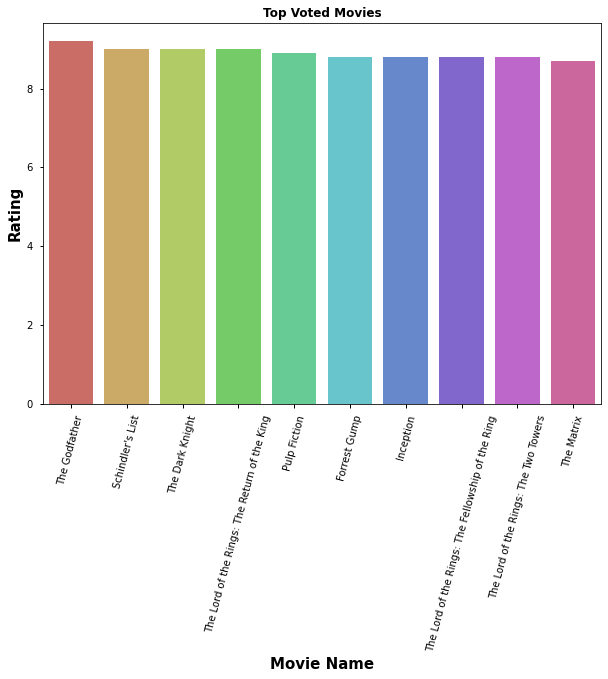

In [42]:
fig,axs=plt.subplots(figsize=(10,7))
g=sns.barplot(x=top_voted['movie_name'][:10],y=top_voted['rating'][:10], palette = 'hls')
plt.title("Top Voted Movies", weight = "bold")
plt.xlabel('Movie Name',fontsize=15,fontweight="bold")
plt.ylabel('Rating',fontsize=15,fontweight="bold")
plt.xticks(rotation=75)
plt.show()

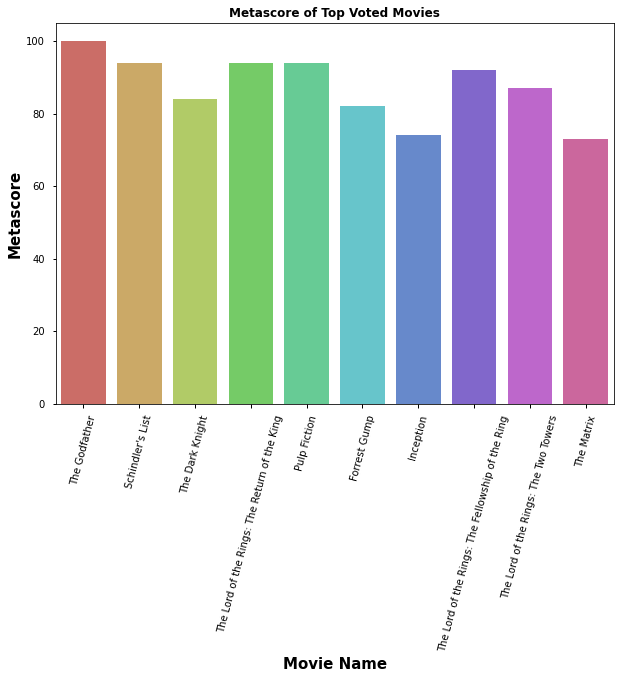

In [43]:
fig,axs=plt.subplots(figsize=(10,7))
g=sns.barplot(x=top_voted['movie_name'][:10],y=top_voted['metascore'][:10], palette = 'hls')
plt.title("Metascore of Top Voted Movies", weight = "bold")
plt.xlabel('Movie Name',fontsize=15,fontweight="bold")
plt.ylabel('Metascore',fontsize=15,fontweight="bold")
plt.xticks(rotation=75)
plt.show()

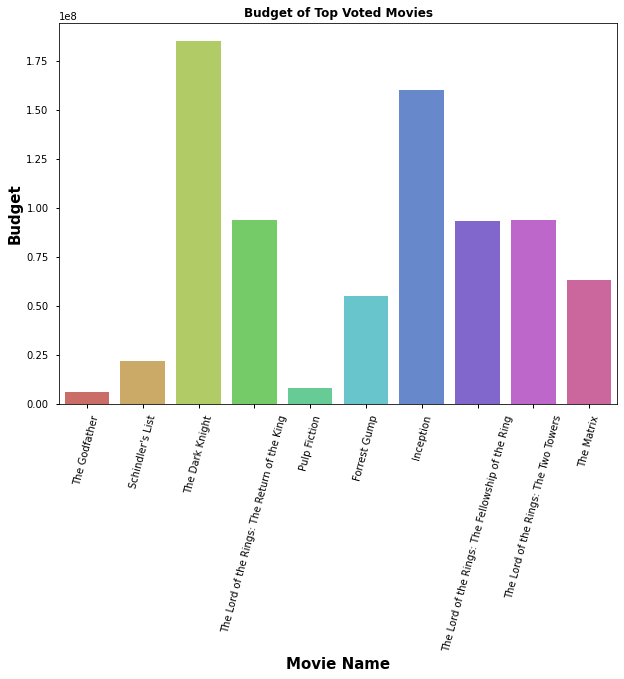

In [44]:
fig,axs=plt.subplots(figsize=(10,7))
g=sns.barplot(x=top_voted['movie_name'][:10],y=top_voted['budget'][:10], palette = 'hls')
plt.title("Budget of Top Voted Movies", weight = "bold")
plt.xlabel('Movie Name',fontsize=15,fontweight="bold")
plt.ylabel('Budget',fontsize=15,fontweight="bold")
plt.xticks(rotation=75)
plt.show()

In [45]:
df["genre1"].unique()


array(['Action', 'Drama', 'Animation', 'Adventure', 'Crime', 'Biography',
       'Comedy', 'Mystery', 'Horror', 'Documentary', 'Fantasy'],
      dtype=object)

In [46]:
df.genre1.value_counts()

Action         443
Animation      155
Comedy         147
Adventure       85
Drama           77
Biography       31
Crime           29
Horror          20
Mystery          3
Fantasy          3
Documentary      2
Name: genre1, dtype: int64

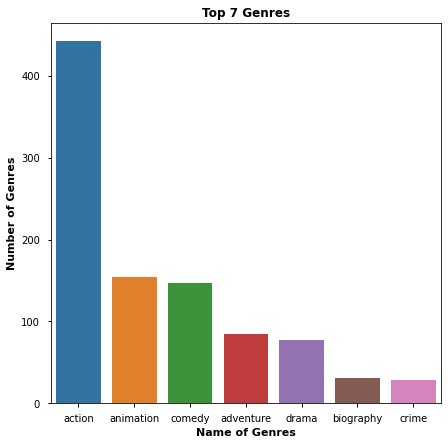

In [47]:
from collections import Counter
genre=[]
for x in df['genre1']:
    for y in x.split(','):
        genre.append(y.strip().lower())

count=Counter(genre)
count=count.most_common()[:7]
x,y=map(list,zip(*count))

fig,axs=plt.subplots(figsize=(7,7))
g=sns.barplot(x,y)
g.set_ylabel("Number of Genres", weight = "bold")
g.set_xlabel("Name of Genres", weight = "bold")

g.set_title("Top 7 Genres", weight = "bold")
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

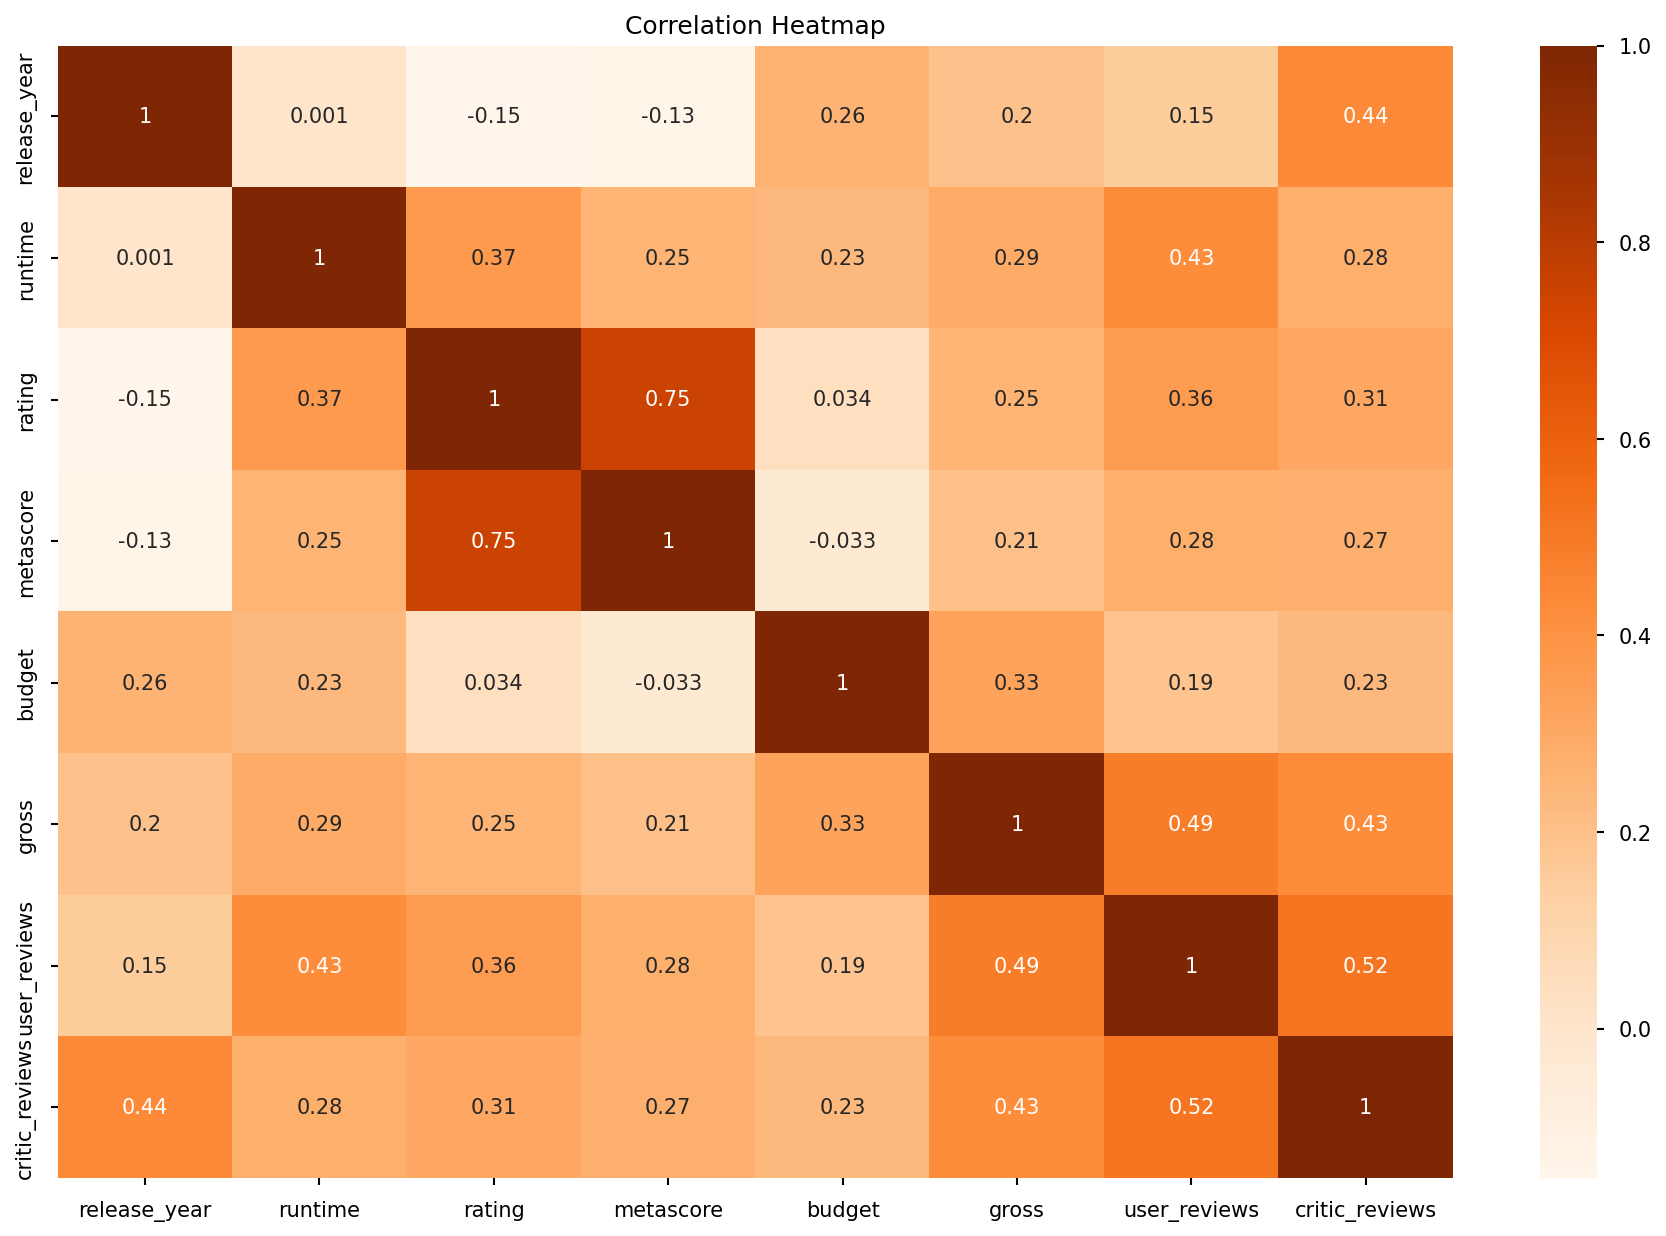

In [48]:
plt.figure(figsize=(15,10),dpi=150)
sns.heatmap(df.corr(), cmap="Oranges", annot=True)
plt.title('Correlation Heatmap')


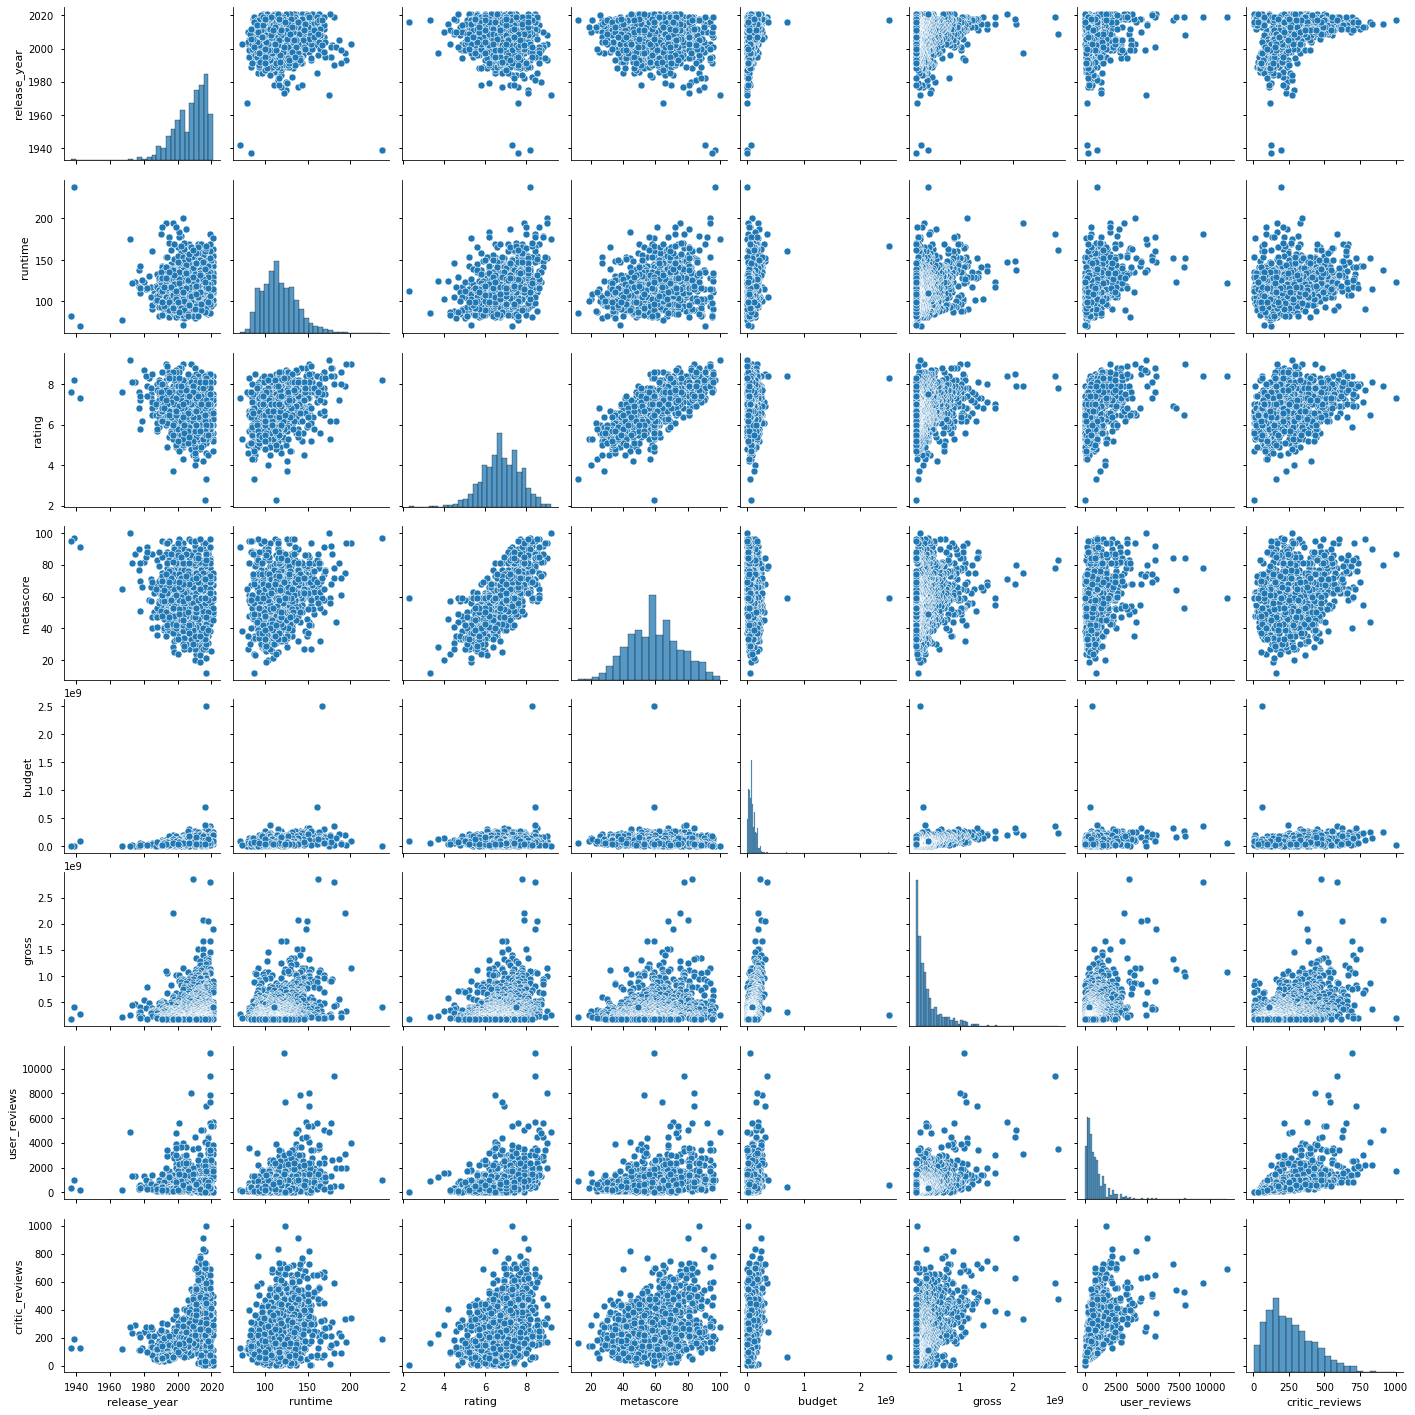

In [49]:
sns.pairplot(df)


In [50]:
df_subset1=df[['movie_name','user_reviews','runtime', 'metascore','rating']]
df_subset1.head(10)

,movie_name,user_reviews,runtime,metascore,rating
0,Avatar,3500.00,162.00,83.00,7.80
1,Avengers: Endgame,9400.00,181.00,78.00,8.40
2,Titanic,3100.00,194.00,75.00,7.90
3,Star Wars: Episode VII - The Force Awakens,5000.00,138.00,80.00,7.90
4,Avengers: Infinity War,4500.00,149.00,68.00,8.50
5,Spider-Man: No Way Home,5700.00,148.00,71.00,8.40
6,Jurassic World,1600.00,124.00,59.00,7.00
7,The Lion King,3000.00,118.00,55.00,6.80
8,The Avengers,2000.00,143.00,69.00,8.00
9,Furious 7,788.00,137.00,67.00,7.10


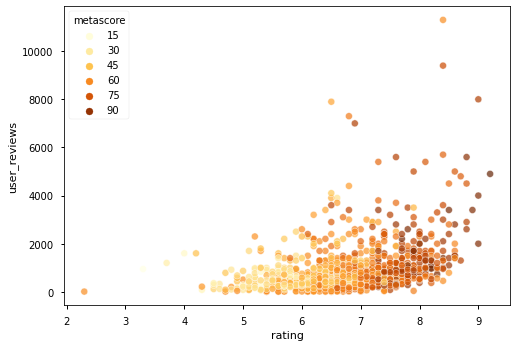

In [51]:
sns.scatterplot(data=df_subset1, x="rating", y="user_reviews",hue='metascore' ,alpha=0.7, sizes=(50, 800), palette='YlOrBr')

# show the graph
# figure size in inches
sns.color_palette("YlOrBr", as_cmap=True)
plt.show()

# **Feature Engineering**

In [52]:
df.head()

,movie_name,release_year,runtime,director,genre1,genre2,genre3,rating,metascore,budget,gross,user_reviews,critic_reviews
0,Avatar,2009,162.00,James Cameron,Action,Adventure,Fantasy,7.80,83.00,237000000.00,2847379794.00,3500.00,479.00
1,Avengers: Endgame,2019,181.00,Anthony Russo,Action,Adventure,Drama,8.40,78.00,356000000.00,2797501328.00,9400.00,589.00
2,Titanic,1997,194.00,James Cameron,Drama,Romance,-,7.90,75.00,200000000.00,2201647264.00,3100.00,331.00
3,Star Wars: Episode VII - The Force Awakens,2015,138.00,J.J. Abrams,Action,Adventure,Sci-Fi,7.90,80.00,245000000.00,2069521700.00,5000.00,909.00
4,Avengers: Infinity War,2018,149.00,Anthony Russo,Action,Adventure,Sci-Fi,8.50,68.00,321000000.00,2048359754.00,4500.00,626.00


In [53]:
df.drop(["genre2"], axis = 1, inplace = True)


In [54]:
df.drop(["genre3"], axis = 1, inplace = True)


In [55]:
df.rename(columns = {'genre1':'genre'}, inplace = True)


In [56]:
data=df.copy()

In [57]:
data.rating.value_counts().sort_index(ascending=False)


9.20     1
9.00     3
8.90     1
8.80     4
8.70     2
8.60     8
8.50     7
8.40    13
8.30    10
8.20    15
8.10    18
8.00    23
7.90    20
7.80    26
7.70    28
7.60    35
7.50    23
7.40    35
7.30    44
7.20    39
7.10    35
7.00    47
6.90    41
6.80    38
6.70    40
6.60    54
6.50    44
6.40    49
6.30    35
6.20    37
6.10    30
6.00    23
5.90    22
5.80    23
5.70    22
5.60    20
5.50    10
5.40    11
5.30    11
5.20    11
5.10     8
5.00     5
4.90     6
4.80     3
4.70     3
4.60     2
4.50     3
4.30     2
4.20     1
4.00     1
3.70     1
3.30     1
2.30     1
Name: rating, dtype: int64

In [58]:
data.loc[(data["rating"] > 8.50),"ratings"]= 4
data.loc[(data["rating"] > 6.90) & (data["rating"] <= 8.50), "ratings"] = 3 
data.loc[(data["rating"] > 5.90) & (data["rating"] <= 6.90), "ratings"] = 2
data.loc[(data["rating"] > 4.90) & (data["rating"] <= 5.90), "ratings"] = 1
data.loc[(data["rating"] > 2.20) & (data["rating"] <= 4.90), "ratings"] = 0


In [59]:
data.loc[(data["metascore"] > 80),"metascores"]= 5
data.loc[(data["metascore"] > 70) & (data["metascore"] <= 80), "metascores"] = 4
data.loc[(data["metascore"] > 60) & (data["metascore"] <= 70), "metascores"] = 3
data.loc[(data["metascore"] > 50) & (data["metascore"] <= 60), "metascores"] = 2
data.loc[(data["metascore"] > 40) & (data["metascore"] <= 50), "metascores"] = 1
data.loc[(data["metascore"] > 11) & (data["metascore"] <= 40), "metascores"] = 0


In [60]:
data.runtime.describe()

count   995.00
mean    117.18
std      21.42
min      70.00
25%     101.00
50%     115.00
75%     130.00
max     238.00
Name: runtime, dtype: float64

In [61]:
data.loc[(data["runtime"] > 180),"runtimess"]= 3
data.loc[(data["runtime"] > 130) & (data["runtime"] <= 180), "runtimess"] = 2
data.loc[(data["runtime"] > 100) & (data["runtime"] <= 130), "runtimess"] = 1
data.loc[(data["runtime"] > 69) & (data["runtime"] <= 100), "runtimess"] = 0

In [62]:
data.budget.describe()

count          995.00
mean      96252448.24
std       99768139.92
min          15000.00
25%       45000000.00
50%       80000000.00
75%      130000000.00
max     2500000000.00
Name: budget, dtype: float64

In [63]:
pd.qcut(data.budget, 8)


0      (170000000.0, 2500000000.0]
1      (170000000.0, 2500000000.0]
2      (170000000.0, 2500000000.0]
3      (170000000.0, 2500000000.0]
4      (170000000.0, 2500000000.0]
                  ...             
990       (27250000.0, 45000000.0]
991     (100000000.0, 130000000.0]
992       (27250000.0, 45000000.0]
993       (27250000.0, 45000000.0]
994       (27250000.0, 45000000.0]
Name: budget, Length: 995, dtype: category
Categories (8, interval[float64, right]): [(14999.999, 27250000.0] < (27250000.0, 45000000.0] <
                                           (45000000.0, 65000000.0] < (65000000.0, 80000000.0] <
                                           (80000000.0, 100000000.0] < (100000000.0, 130000000.0] <
                                           (130000000.0, 170000000.0] < (170000000.0, 2500000000.0]]

In [64]:
data.loc[(data["budget"] > 180000000.0),"budgets"]= 9
data.loc[(data["budget"] > 150000000.0) & (data["budget"] <= 180000000.0), "budgets"] = 8
data.loc[(data["budget"] > 120000000.0) & (data["budget"] <= 150000000.0), "budgets"] = 7
data.loc[(data["budget"] > 95000000.0) & (data["budget"] <= 120000000.0), "budgets"] = 6
data.loc[(data["budget"] > 80000000.0) & (data["budget"] <= 95000000.0), "budgets"] = 5
data.loc[(data["budget"] > 70000000.0) & (data["budget"] <= 80000000.0), "budgets"] = 4
data.loc[(data["budget"] > 55000000.0 ) & (data["budget"] <= 70000000.0), "budgets"] = 3
data.loc[(data["budget"] > 38000000.0) & (data["budget"] <= 55000000.0), "budgets"] = 2
data.loc[(data["budget"] > 23000000.0) & (data["budget"] <= 38000000.0), "budgets"] = 1
data.loc[(data["budget"] > 14999.999) & (data["budget"] <= 23000000.0), "budgets"] = 0


In [65]:
data.gross.describe()

count          995.00
mean     404754821.95
std      292646207.99
min      173839072.00
25%      219239608.50
50%      304868961.00
75%      467293987.00
max     2847379794.00
Name: gross, dtype: float64

In [66]:
pd.qcut(data.gross,9)

0       (746490807.778, 2847379794.0]
1       (746490807.778, 2847379794.0]
2       (746490807.778, 2847379794.0]
3       (746490807.778, 2847379794.0]
4       (746490807.778, 2847379794.0]
                    ...              
990    (173839071.999, 190951445.444]
991    (173839071.999, 190951445.444]
992    (173839071.999, 190951445.444]
993    (173839071.999, 190951445.444]
994    (173839071.999, 190951445.444]
Name: gross, Length: 995, dtype: category
Categories (9, interval[float64, right]): [(173839071.999, 190951445.444] < (190951445.444, 214114318.667] <
                                           (214114318.667, 242721355.667] < (242721355.667, 282527793.333] < ... <
                                           (332272633.444, 387788509.333] < (387788509.333, 495156794.333] <
                                           (495156794.333, 746490807.778] < (746490807.778, 2847379794.0]]

In [67]:
df1 = data.drop(['runtime', 'rating', 'metascore','budget',"movie_name","director"], axis=1)

In [68]:
df1

,release_year,genre,gross,user_reviews,critic_reviews,ratings,metascores,runtimess,budgets
0,2009,Action,2847379794.00,3500.00,479.00,3.00,5.00,2.00,9.00
1,2019,Action,2797501328.00,9400.00,589.00,3.00,4.00,3.00,9.00
2,1997,Drama,2201647264.00,3100.00,331.00,3.00,4.00,3.00,9.00
3,2015,Action,2069521700.00,5000.00,909.00,3.00,4.00,2.00,9.00
4,2018,Action,2048359754.00,4500.00,626.00,3.00,3.00,2.00,9.00
...,...,...,...,...,...,...,...,...,...
990,2013,Comedy,173965010.00,297.00,260.00,1.00,0.00,1.00,1.00
991,2018,Adventure,173961069.00,474.00,175.00,1.00,0.00,0.00,6.00
992,2000,Action,173959438.00,164.00,99.00,1.00,0.00,0.00,1.00
993,2011,Action,173930596.00,646.00,364.00,2.00,2.00,1.00,2.00


# **Regression**


- Dummy uygulamadan önceki değer

In [69]:
# "genre" burada object halindedir, bir sonrakinde dummy yapıcaz.
X=df1.drop(["gross","genre"], axis=1)
Y = df1["gross"]

# perform train/val split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=20)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=20)

# fit linear regression to training data
lr_model = LinearRegression()

# fit linear model

lr_model.fit(x_train,y_train)
pred = lr_model.predict(x_val)

# calculating mse

print("MSE Value: ", np.mean((pred - y_val)**2), "\n")

# evaluation using r-square

print("R^2 Score Value (Test): ", lr_model.score(x_test, y_test), "\n")

print("R^2 Score Value (Validation): ", lr_model.score(x_val, y_val), "\n")

print("Coefficients:\n", lr_model.coef_)

MSE Value:  3.677556980307527e+16 

R^2 Score Value (Test):  0.4102773042833183 

R^2 Score Value (Validation):  0.47623619324626987 

Coefficients:
 [ -511858.18615646    69059.78485464   192359.06501585 48099412.30928037
  9887559.27629908 -2803184.33955806 40727888.2881942 ]


# **Convert features to Dummy variables:**

**Dummy in Genre**

In [70]:

df1 = pd.get_dummies(df1, columns=['genre'])
df1.head(3)


,release_year,gross,user_reviews,critic_reviews,ratings,metascores,runtimess,budgets,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Fantasy,genre_Horror,genre_Mystery
0,2009,2847379794.00,3500.00,479.00,3.00,5.00,2.00,9.00,1,0,0,0,0,0,0,0,0,0,0
1,2019,2797501328.00,9400.00,589.00,3.00,4.00,3.00,9.00,1,0,0,0,0,0,0,0,0,0,0
2,1997,2201647264.00,3100.00,331.00,3.00,4.00,3.00,9.00,0,0,0,0,0,0,0,1,0,0,0


**Dummy in Year**

In [71]:
min_year=df1.release_year.min()
min_year

1937

In [72]:
#Subtract the min year from each year 
df1['release_year']=df1.release_year.sub(min_year)

In [73]:
df1.head()


,release_year,gross,user_reviews,critic_reviews,ratings,metascores,runtimess,budgets,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Fantasy,genre_Horror,genre_Mystery
0,72,2847379794.00,3500.00,479.00,3.00,5.00,2.00,9.00,1,0,0,0,0,0,0,0,0,0,0
1,82,2797501328.00,9400.00,589.00,3.00,4.00,3.00,9.00,1,0,0,0,0,0,0,0,0,0,0
2,60,2201647264.00,3100.00,331.00,3.00,4.00,3.00,9.00,0,0,0,0,0,0,0,1,0,0,0
3,78,2069521700.00,5000.00,909.00,3.00,4.00,2.00,9.00,1,0,0,0,0,0,0,0,0,0,0
4,81,2048359754.00,4500.00,626.00,3.00,3.00,2.00,9.00,1,0,0,0,0,0,0,0,0,0,0


**Dummy to Regression**

In [74]:
X2=df1.drop(["gross"], axis=1)
Y = df1["gross"]

# perform train/val split
x_train, x_test, y_train, y_test = train_test_split(X2, Y, test_size=0.20, random_state=20)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=20)

# fit linear regression to training data
lr_model = LinearRegression()

# fit linear model

lr_model.fit(x_train,y_train)
pred = lr_model.predict(x_val)

# calculating mse

print("MSE Value: ", np.mean((pred - y_val)**2), "\n")

# evaluation using r-square

print("R^2 Score Value (Test): ", lr_model.score(x_test, y_test), "\n")

print("R^2 Score Value (Validation): ", lr_model.score(x_val, y_val), "\n")

print("Coefficients:\n", lr_model.coef_)

MSE Value:  3.4487926044708732e+16 

R^2 Score Value (Test):  0.44010306809869726 

R^2 Score Value (Validation):  0.5088171976955407 

Coefficients:
 [-8.45239278e+05  7.66781781e+04  2.41036423e+05  4.54785862e+07
  6.04691711e+06  2.97852049e+07  3.58275365e+07  1.82181916e+07
  6.21598118e+07  1.00870721e+08 -4.23037104e+07  7.28519175e+07
 -1.45337479e+08 -2.07625000e+07 -1.11246246e+07 -1.72059033e+08
 -6.48862719e+06  1.43975333e+08]


# **Take log of gross and graph**


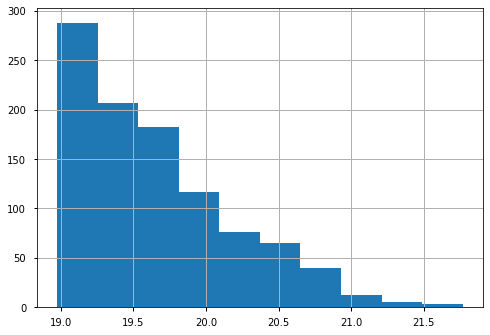

In [75]:
df1['log_gross']=np.log(df1.gross)
# looks better
df1.log_gross.hist();

In [76]:
#log to gross
X3=df1.drop(["log_gross","gross"], axis=1)
Y = df1["log_gross"]

# perform train/val split
x_train, x_test, y_train, y_test = train_test_split(X3, Y, test_size=0.20, random_state=20)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=20)

# fit linear regression to training data
lr_model = LinearRegression()

# fit linear model

lr_model.fit(x_train,y_train)
pred = lr_model.predict(x_val)

# calculating mse

print("MSE Value: ", np.mean((pred - y_val)**2), "\n")

# evaluation using r-square

print("R^2 Score Value (Test): ", lr_model.score(x_test, y_test), "\n")

print("R^2 Score Value (Validation): ", lr_model.score(x_val, y_val), "\n")

print("Coefficients:\n", lr_model.coef_)

MSE Value:  0.1269308831998663 

R^2 Score Value (Test):  0.4305748592173465 

R^2 Score Value (Validation):  0.5326125444019985 

Coefficients:
 [-1.77139849e-03  1.24227238e-04  4.95682503e-04  1.01602866e-01
  9.27680980e-03  4.84927314e-02  7.39083098e-02  4.61966758e-02
  1.42554306e-01  2.26434888e-01 -5.59524451e-02  1.25729227e-01
 -2.95736324e-01 -3.61487859e-02 -5.76953851e-03 -4.69064109e-01
  1.70129809e-04  3.21585976e-01]


# **Ridge and Lasso Regression**

In [77]:
df1.drop(["gross"], axis = 1, inplace = True)


In [78]:
X, y = df1.drop('log_gross',axis=1), df1['log_gross']

# hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=0.05,normalize=True)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [79]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')


Linear Regression val R^2: 0.478
Ridge Regression val R^2: 0.473
Degree 2 polynomial regression val R^2: 0.357


In [80]:
lm.fit(X,y)
print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')

Linear Regression test R^2: 0.406


In [81]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('log_gross ~ release_year + user_reviews + critic_reviews + ratings + metascores + runtimess +budgets+genre_Action+genre_Adventure +	genre_Animation +	genre_Biography	+ genre_Comedy + genre_Crime	+ genre_Documentary	+ genre_Drama	+ genre_Fantasy	+ genre_Horror +genre_Mystery', data=df1, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_gross   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     47.45
Date:                Thu, 21 Apr 2022   Prob (F-statistic):          5.94e-115
Time:                        11:14:09   Log-Likelihood:                -495.40
No. Observations:                 995   AIC:                             1027.
Df Residuals:                     977   BIC:                             1115.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            17.3819      0.110    158.466      0.000      17.167      17.597
release_year         -0.0028      0.002     -1.806      0.071      -0.006       0.000
user_reviews          0.0001   1.52e-05      8.782      0.000       0.000       0.000
critic_reviews        0.0005      0.000      4.355      0.000       0.000       0.001
ratings               0.0594      0.023      2.603      0.009       0.015       0.104
metascores            0.0103      0.012      0.831      0.406      -0.014       0.035
runtimess             0.0694      0.024      2.858      0.004       0.022       0.117
budgets               0.0688      0.006     10.773      0.000       0.056       0.081
genre_Action          1.6431      0.045     36.634      0.000       1.555       1.731
genre_Adventure       1.7618      0.057     30.797      0.000       1.650       1.874
genre_Animation       1.9235      0.058     33.286      0.000       1.810       2.037
genre_Biography       1.4758      0.079     18.640      0.000       1.320       1.631
genre_Comedy          1.6833      0.051     33.160      0.000       1.584       1.783
genre_Crime           1.3436      0.080     16.830      0.000       1.187       1.500
genre_Documentary     1.5199      0.263      5.776      0.000       1.003       2.036
genre_Drama           1.6112      0.058     27.656      0.000       1.497       1.725
genre_Fantasy         1.1257      0.216      5.220      0.000       0.702       1.549
genre_Horror          1.6074      0.094     17.031      0.000       1.422       1.793
genre_Mystery         1.6866      0.216      7.820      0.000       1.263       2.110
==============================================================================
Omnibus:                       26.678   Durbin-Watson:                   0.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.113
Skew:                           0.403   Prob(JB):                     7.86e-07
Kurtosis:                       3.168   Cond. No.                     4.48e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  1e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""